In [2]:
import rasterio
import numpy as np

# Load the two TIFF images
with rasterio.open(r'C:\Users\omkol\Downloads\landcover_colombian_amazon_2014.tif') as src1, rasterio.open(r'C:\Users\omkol\Downloads\landcover_colombian_amazon_2016.tif') as src2:
    # Read the data as numpy arrays
    image1 = src1.read(1)  # Assuming single band image
    image2 = src2.read(1)  # Assuming single band image

# Define the intensity value to detect (1 in this case)
target_intensity = 1

# Create a mask for pixels with the target intensity in both images
mask1 = (image1 == target_intensity)
mask2 = (image2 == target_intensity)

# Calculate the change in the presence of the target intensity
change = np.logical_xor(mask1, mask2).astype(np.uint8)

# Define the output file path for the boolean change map
output_file = 'boolean_change_map_intensity_1.tif'

# Write the boolean change map as a new TIFF image
with rasterio.open(output_file, 'w', driver='GTiff',
                   height=change.shape[0], width=change.shape[1],
                   count=1, dtype=np.uint8) as dst:
    dst.write(change, 1)

print(f'Boolean change map for intensity {target_intensity} saved as {output_file}')


C:\Users\omkol\anaconda3\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Intensity 1 has decreased in the second image.
Boolean change map for intensity 1 saved as boolean_change_map_intensity_1.tif


In [4]:
import matplotlib.pyplot as plt

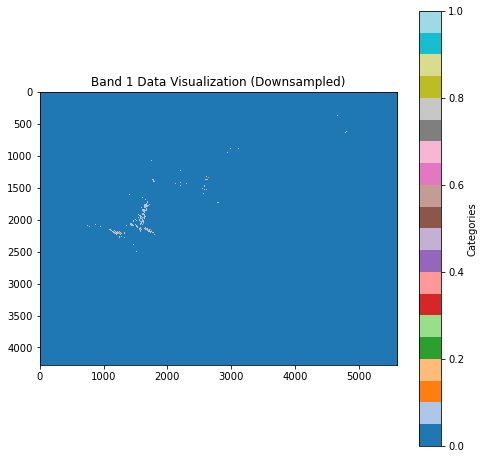

Deforestration happened
Total changed area: 1.29237 square kilometers


In [11]:
with rasterio.open('boolean_change_map_intensity_1.tif') as src:
    # Read the data in Band 1
    band1_data = src.read(1)

    # Downsample the data (e.g., by a factor of 8)
    downsampled_data = band1_data[::8, ::8]

    # Create a color-mapped plot
    fig, ax = plt.subplots(figsize=(8, 8))  # Create a new figure and axes
    cmap = plt.get_cmap('tab20')
    im = ax.imshow(downsampled_data, cmap=cmap)

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, label='Categories')

    # Set the title
    ax.set_title('Band 1 Data Visualization (Downsampled)')

    # Display the plot
    plt.show()

# Count the number of pixels with the target intensity in each image
count_intensity1_image1 = np.sum(image1 == target_intensity)
count_intensity1_image2 = np.sum(image2 == target_intensity)

# Determine if intensity 1 has increased or decreased
if count_intensity1_image2 > count_intensity1_image1:
    print(f'Afforestration happened')
elif count_intensity1_image2 < count_intensity1_image1:
    print(f'Deforestration happened')
else:
    print(f'No Change')
    
# Calculate the total changed area in square meters
total_changed_area_sq_meters = np.sum(change)

# Convert the total changed area to square kilometers
total_changed_area_sq_km = total_changed_area_sq_meters / 1e6

print(f'Total changed area: {total_changed_area_sq_km} square kilometers')